# Info about data

## MERRA-2

As described by [Randles and Da Sliva](https://gmao.gsfc.nasa.gov/research/science_snapshots/2015/MERRA2_global_aerosol_dist.php), the aerosol component of MERRA-2 includes "5 aerosol tracers (dust, sea-salt, sulfate, black and organic carbon) whose lifetime is driven by prescribed sea-surface temperature and sea-ice, daily volcanic and biomass burning emissions, as well as high-resolution inventories of anthropogenic emission sources. The GAAS [Goddard Aerosol Assimilation System] includes assimilation of bias-correct aerosol optical depth (AOD) from several ground- and satellite-based sensors".

The evaluation of the aerosol products concludes that the MERRA-2 aerosol optical depth (AOD) has overall high correlation and low bias compared to independent observations. Also PM2.5 generally agrees well with observations. However, aerosol speciation is not fully constrained by the assimilation of observational data and heavily depends on the background model. The document in particularly notes that "it is possible to have a good agreement between AOD and observations while having a poor agreement with speciated mass" ([Randles et al, 2017](https://gmao.gsfc.nasa.gov/pubs/docs/Randles887.pdf)). The fractioning of PM2.5 to different species needs to be taken with a pinch of salt.

### PM2.5
The PM2.5 provided is the dry mass, defined in terms of the geometric size of the particles. The swelling due to humidity is not accounted for. Note, that observations are usually representative of the aerodynamic particle size ([Collow et al., 2023]( https://gmao.gsfc.nasa.gov/pubs/docs/Collow1489.pdf)). 

All data is for surface level concentrations, given in µg/m3, averaged for the year 2024.

Fractions are given as percentage, and calculated as type of aerosol concentration / total PM2.5 concentrations * 100%.


<!-- ### References
Collow, A., V. Buchard, M. Chin, P. Colarco, A. Darmenov, and A. da Silva, 2023:
Supplemental Documentation for GEOS Aerosol Products. GMAO Office Note No. 22 (Version
1.1), 8 pp, available at https://gmao.gsfc.nasa.gov/pubs/docs/Collow1489.pdf. -->

# Data preview

In [2]:
import rioxarray as rxr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from crea_graphics.colors import goodbad_cont

In [7]:
# make plotting function
def make_plot(data, title, vmin=None, vmax=None):
    # create cartory figure
    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

    # plot the data on the map axis
    data.plot(ax=ax, cmap=goodbad_cont, 
              vmin=vmin, vmax=vmax)

    # add coastlines and country borders
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    
    plt.title(title)

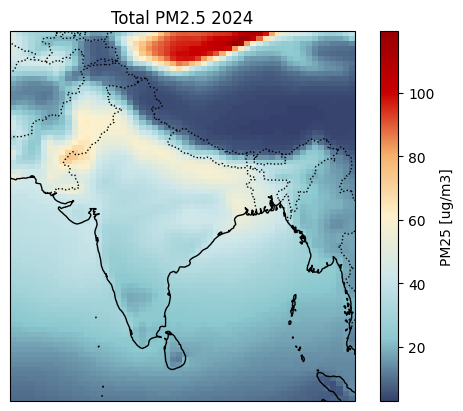

In [19]:
# Total PM2.5 
ds = rxr.open_rasterio("../data/result/merra/surf_aerosol_massconc/Total_PM25_2024.tif")
make_plot(ds.squeeze(), 'Total PM2.5 2024')

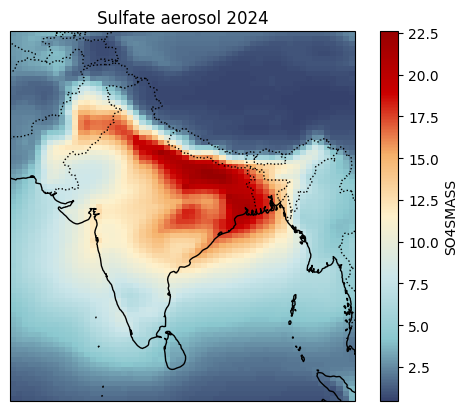

In [20]:
# Sulfate aerosol
ds = rxr.open_rasterio("../data/result/merra/surf_aerosol_massconc/Sulfate_aerosol_2024.tif")
make_plot(ds.squeeze(), 'Sulfate aerosol 2024')

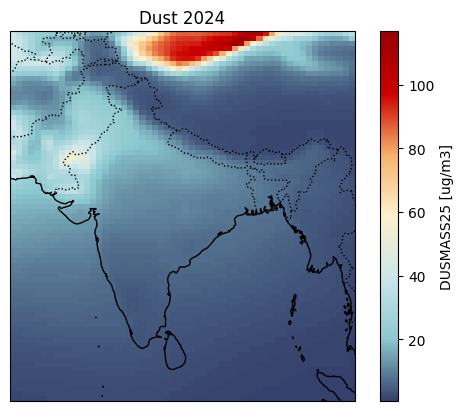

In [21]:
# Dust 
ds = rxr.open_rasterio("../data/result/merra/surf_aerosol_massconc/Dust_PM25_2024.tif")
make_plot(ds.squeeze(), 'Dust 2024')

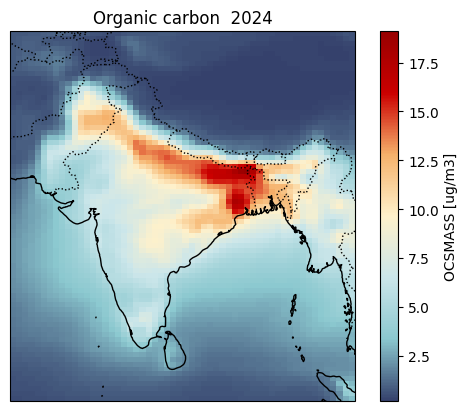

In [22]:
# Organic carbon 
ds = rxr.open_rasterio("../data/result/merra/surf_aerosol_massconc/Organic_carbon_2024.tif")
make_plot(ds.squeeze(), 'Organic carbon  2024')

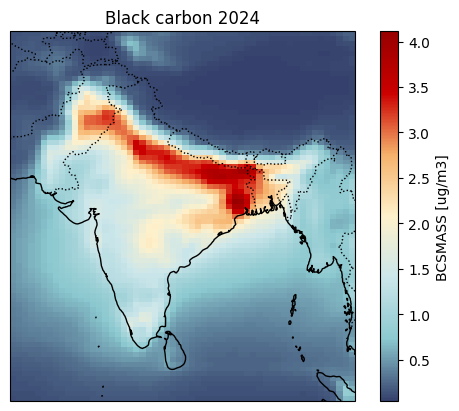

In [23]:
# Black carbon 
ds = rxr.open_rasterio("../data/result/merra/surf_aerosol_massconc/Black_carbon_2024.tif")
make_plot(ds.squeeze(), 'Black carbon 2024')

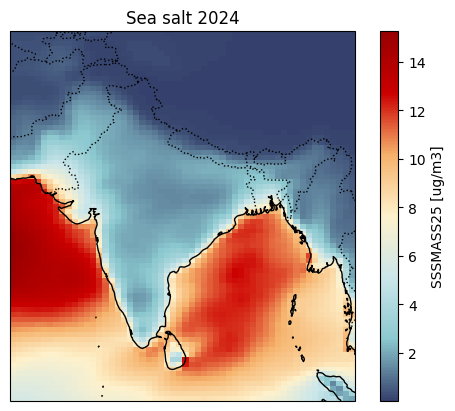

In [24]:
# Seasalt
ds = rxr.open_rasterio("../data/result/merra/surf_aerosol_massconc/Seasalt_PM25_2024.tif")
make_plot(ds.squeeze(), 'Sea salt 2024')

### Fractions

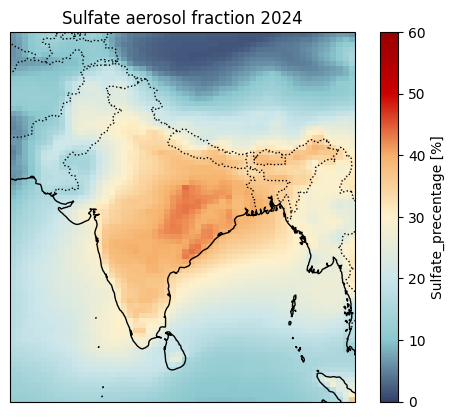

In [11]:
# Sulfate aerosol
ds = rxr.open_rasterio("../data/result/merra/surf_aerosol_massconc/Sulfate_fraction_2024.tif")
make_plot(ds.squeeze(), 'Sulfate aerosol fraction 2024', vmin=0, vmax=60)
